In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [2]:
hsbc = pd.read_excel("data.xlsx", sheet_name="0005.HK")
gal = pd.read_excel("data.xlsx", sheet_name="0027.HK")
hl = pd.read_excel("data.xlsx", sheet_name="0101.HK")

In [3]:
hsbc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,111.000000,111.500000,107.500000,108.000000,53.067974,3908164.0
1,2000-01-04,106.000000,106.500000,105.000000,106.000000,52.085232,6895378.0
2,2000-01-05,101.000000,102.000000,99.500000,100.500000,49.382702,14657098.0
3,2000-01-06,101.000000,102.000000,96.250000,97.000000,47.662907,10632084.0
4,2000-01-07,98.500000,101.000000,97.500000,100.500000,49.382702,8368286.0
...,...,...,...,...,...,...,...
5778,2023-02-15,58.200001,58.200001,57.150002,57.549999,57.549999,16059738.0
5779,2023-02-16,57.950001,58.150002,57.700001,58.099998,58.099998,12427999.0
5780,2023-02-17,58.000000,58.299999,58.000000,58.200001,58.200001,15946227.0
5781,2023-02-20,58.400002,58.900002,58.200001,58.750000,58.750000,18946483.0


In [4]:
hsbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5783 non-null   datetime64[ns]
 1   Open       5781 non-null   float64       
 2   High       5781 non-null   float64       
 3   Low        5781 non-null   float64       
 4   Close      5781 non-null   float64       
 5   Adj Close  5781 non-null   float64       
 6   Volume     5781 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 316.4 KB


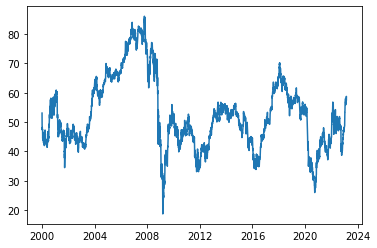

In [5]:
plt.plot(hsbc['Date'], hsbc['Adj Close'])

In [6]:
hsbc_train = hsbc[hsbc['Date'] <= '2022-12-31'].loc[:, ['Date', 'Adj Close']]
hsbc_train.set_index('Date', inplace=True)

hsbc_test = hsbc[hsbc['Date'] > '2022-12-31'].loc[:, ['Date', 'Adj Close']]
hsbc_test.set_index('Date', inplace=True)

In [7]:
hsbc_train.tail()

,Adj Close
Date,
2022-12-22,48.200001
2022-12-23,47.900002
2022-12-28,48.500000
2022-12-29,48.400002
2022-12-30,48.549999


In [8]:
hsbc_train['Adj Close'].isna().sum()

2

In [9]:
hsbc_train[hsbc_train['Adj Close'] == 0]

,Adj Close
Date,


In [10]:
hsbc_train[hsbc_train['Adj Close'].isna()]

,Adj Close
Date,
2011-12-24,NaN
2011-12-31,NaN


In [11]:
hsbc_train['Adj Close'] = hsbc_train['Adj Close'].interpolate(method='linear')


c:\Users\RonaldGustaf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


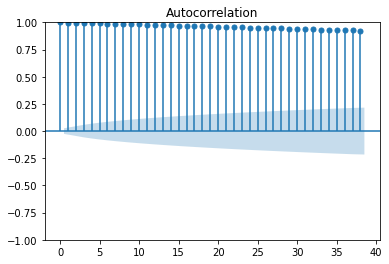

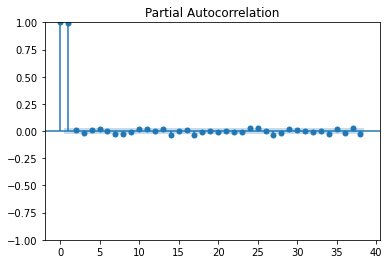

In [12]:
hsbc_acf = plot_acf(hsbc_train['Adj Close'])
hsbc_pacf = plot_pacf(hsbc_train['Adj Close'])

ACF plot high and positive with very very slow decrease.
PACF plot have single spike at lag 1.

Both signs of a trended time series -> not stationary.

In [13]:
adf_test = adfuller(hsbc_train['Adj Close'])
print(f'p-value: {adf_test[1]}')

p-value: 0.1354992348055415


In [14]:
hsbc_train['Adj Close'].diff()

Date
2000-01-03         NaN
2000-01-04   -0.982742
2000-01-05   -2.702530
2000-01-06   -1.719795
2000-01-07    1.719795
                ...   
2022-12-22    0.700001
2022-12-23   -0.299999
2022-12-28    0.599998
2022-12-29   -0.099998
2022-12-30    0.149997
Name: Adj Close, Length: 5750, dtype: float64

In [15]:
adf_test = adfuller(hsbc_train['Adj Close'])
print(f'p-value: {adf_test[1]}')

adf_test = adfuller(hsbc_train['Adj Close'].diff().dropna())
print(f'p-value: {adf_test[1]}')

adf_test = adfuller(hsbc_train['Adj Close'].diff().diff().dropna())
print(f'p-value: {adf_test[1]}')

p-value: 0.1354992348055415
p-value: 0.0
p-value: 0.0


after finding the 1st difference, the p-value is already < 0.05, so we can set the parameter d=1

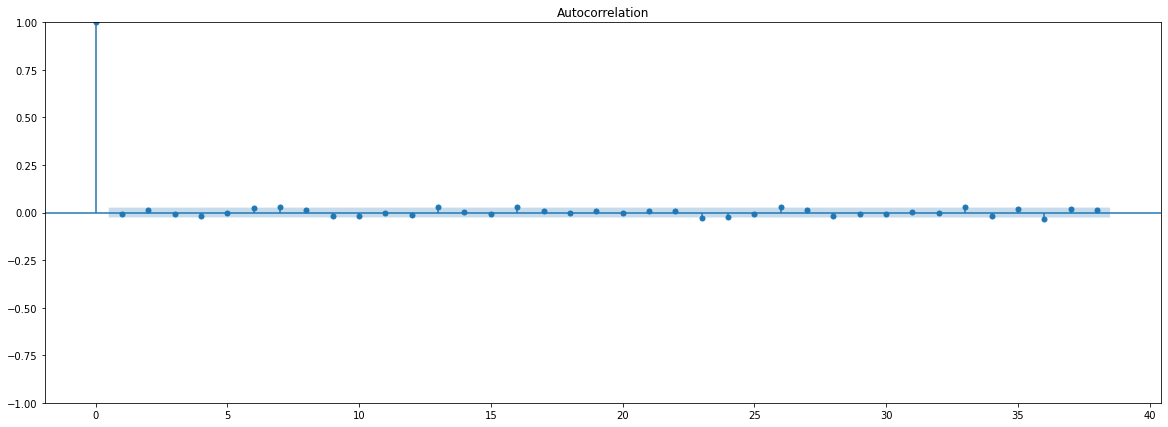

c:\Users\RonaldGustaf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


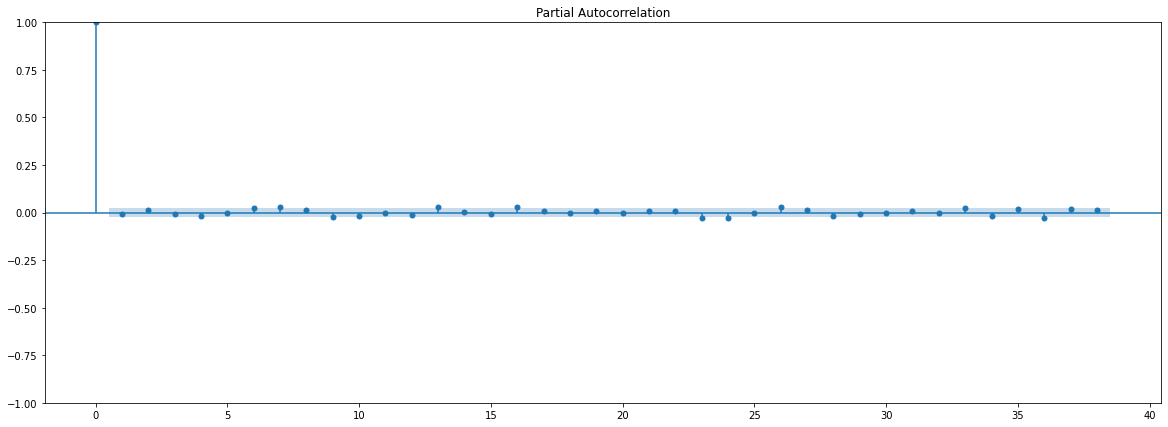

In [16]:
fig, ax = plt.subplots(figsize=(20,7))
acf = plot_acf(hsbc_train['Adj Close'].diff().dropna(), ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(20,7))
pacf = plot_pacf(hsbc_train['Adj Close'].diff().dropna(), ax=ax)
plt.show()

from Lecture 5, we can see that in ACF plot lag 0 is outside the blue area, we can initially try q = 0 MA(0).
and in PACF plot, lag 0 is also outside the blue area, we can initially try p = 0 AR(0).
so currently we can try ARIMA(p=0, d=1, q=0), let's check it with auto_arima to get the most optimal model and check the order of (0, 1, 0).

In [17]:
hsbc_model = auto_arima(hsbc_train, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12846.962, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12844.022, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12845.728, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12845.737, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12842.029, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.979 seconds


so it turns out (0, 1, 0) has the lowest AIC, but using p=0, q=0 will make the model no longer ARIMA model, so we could choose the order (1, 1, 1)

In [26]:
hsbc_model2 = ARIMA(hsbc_train['Adj Close'], order=(1, 1, 1)) 
arima_hsbc = hsbc_model2.fit()

arima_hsbc.summary()

c:\Users\RonaldGustaf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\RonaldGustaf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\RonaldGustaf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 5750
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6419.484
Date:                Tue, 07 Mar 2023   AIC                          12844.969
Time:                        03:14:44   BIC                          12864.939
Sample:                             0   HQIC                         12851.919
                               - 5750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6038      0.355     -1.700      0.089      -1.300       0.092
ma.L1          0.5931      0.357      1.660      0.097      -0.107       1.293
sigma2         0.5463      0.004    137.850      0.000       0.538       0.554
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             30473.35
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.38
Prob(H) (two-sided):                  0.02   Kurtosis:                        14.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Galaxy

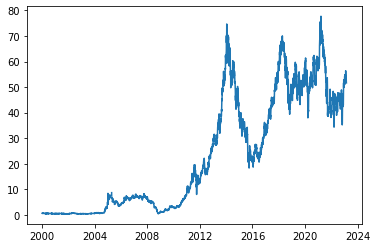

In [41]:
plt.plot(gal['Date'], gal['Adj Close'])

In [42]:
gal_train = gal[gal['Date'] <= '2022-12-31'].loc[:, ['Date', 'Adj Close']]
gal_train.set_index('Date', inplace=True)

gal_test = gal[gal['Date'] > '2022-12-31'].loc[:, ['Date', 'Adj Close']]
gal_test.set_index('Date', inplace=True)

print(gal_train['Adj Close'].isna().sum())
gal_train[gal_train['Adj Close'].isna()]

164


,Adj Close
Date,
2000-02-04,NaN
2000-02-07,NaN
2000-04-04,NaN
2000-04-17,NaN
2000-04-18,NaN
...,...
2007-10-12,NaN
2008-08-06,NaN
2008-08-22,NaN


In [43]:
gal_train[gal_train['Adj Close'] == 0]

,Adj Close
Date,


In [44]:
gal_train['Adj Close'] = gal_train['Adj Close'].interpolate(method='linear')

c:\Users\RonaldGustaf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


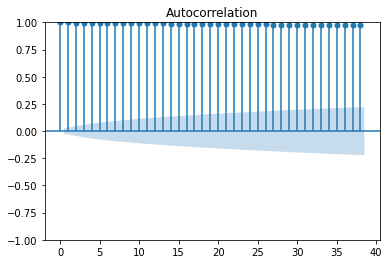

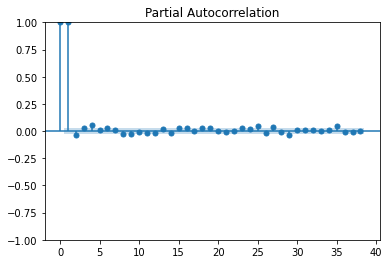

In [45]:
acf = plot_acf(gal_train['Adj Close'])
pacf = plot_pacf(gal_train['Adj Close'])

In [46]:
adf_test = adfuller(gal_train['Adj Close'])
print(f'p-value: {adf_test[1]}')

adf_test = adfuller(gal_train['Adj Close'].diff().dropna())
print(f'p-value: {adf_test[1]}')

adf_test = adfuller(gal_train['Adj Close'].diff().diff().dropna())
print(f'p-value: {adf_test[1]}')

p-value: 0.7715003405036707
p-value: 1.781570518187049e-29
p-value: 0.0


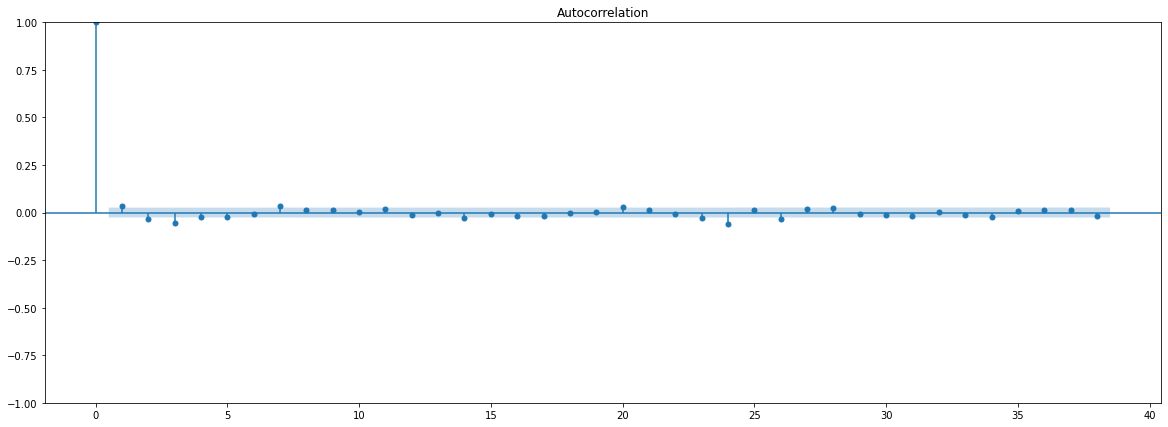

c:\Users\RonaldGustaf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


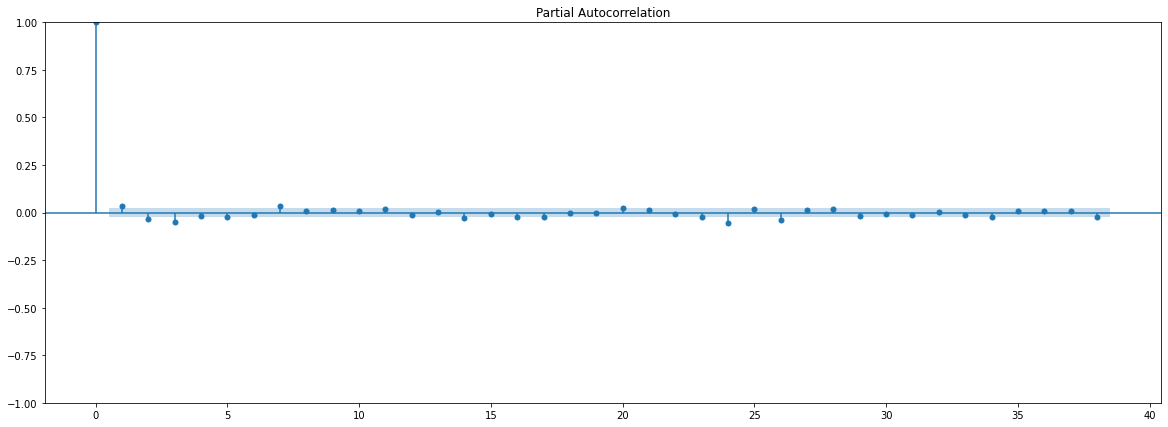

In [47]:
fig, ax = plt.subplots(figsize=(20,7))
acf = plot_acf(gal_train['Adj Close'].diff().dropna(), ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(20,7))
pacf = plot_pacf(gal_train['Adj Close'].diff().dropna(), ax=ax)
plt.show()

In [48]:
gal_model = auto_arima(gal_train, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13550.411, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13554.262, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13550.174, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13549.756, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13552.995, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13546.374, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13534.802, Time=1.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13518.674, Time=2.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13533.070, Time=0.98 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13517.788, Time=3.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13530.225, Time=1.20 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13517.796, Time=3.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13516.438, Time=3.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13530.903, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0

In [49]:
gal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5749
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -6751.557
Date:                Mon, 06 Mar 2023   AIC                          13515.114
Time:                        17:05:37   BIC                          13555.054
Sample:                             0   HQIC                         13529.014
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5774      0.011    146.470      0.000       1.556       1.598
ar.L2         -0.9524      0.010    -91.612      0.000      -0.973      -0.932
ma.L1         -1.5490      0.013   -118.202      0.000      -1.575      -1.523
ma.L2          0.8904      0.017     53.683      0.000       0.858       0.923
ma.L3          0.0291      0.008      3.858      0.000       0.014       0.044
sigma2         0.6134      0.005    135.517      0.000       0.605       0.622
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             29605.84
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              69.78   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

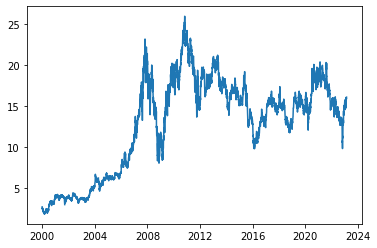

In [50]:
plt.plot(hl['Date'], hl['Adj Close'])

In [51]:
hl_train = hl[hl['Date'] <= '2022-12-31'].loc[:, ['Date', 'Adj Close']]
hl_train.set_index('Date', inplace=True)

hl_test = hl[hl['Date'] > '2022-12-31'].loc[:, ['Date', 'Adj Close']]
hl_test.set_index('Date', inplace=True)

print(hl_train['Adj Close'].isna().sum())
hl_train[hl_train['Adj Close'].isna()]

82


,Adj Close
Date,
2000-02-04,NaN
2000-02-07,NaN
2000-04-04,NaN
2000-04-21,NaN
2000-04-24,NaN
...,...
2004-12-27,NaN
2008-08-06,NaN
2008-08-22,NaN


In [52]:
hl_train[hl_train['Adj Close'] == 0]

,Adj Close
Date,


In [53]:
hl_train['Adj Close'] = hl_train['Adj Close'].interpolate(method='linear')

c:\Users\RonaldGustaf\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


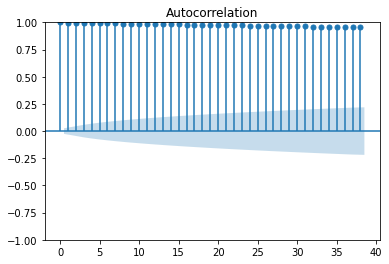

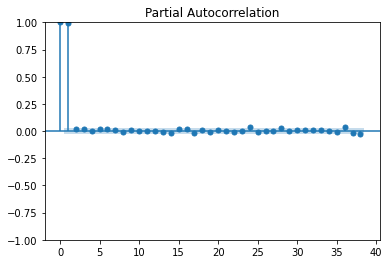

In [54]:
acf = plot_acf(hl_train['Adj Close'])
pacf = plot_pacf(hl_train['Adj Close'])

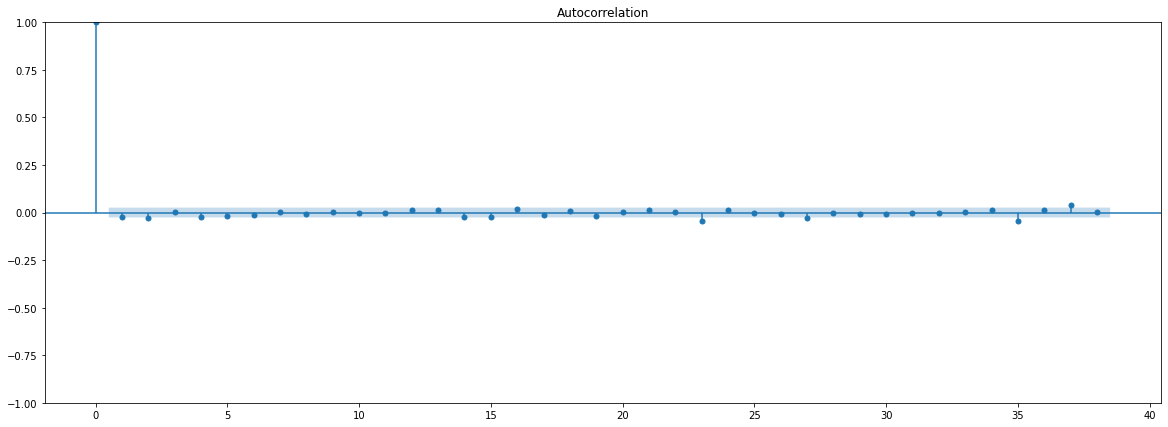

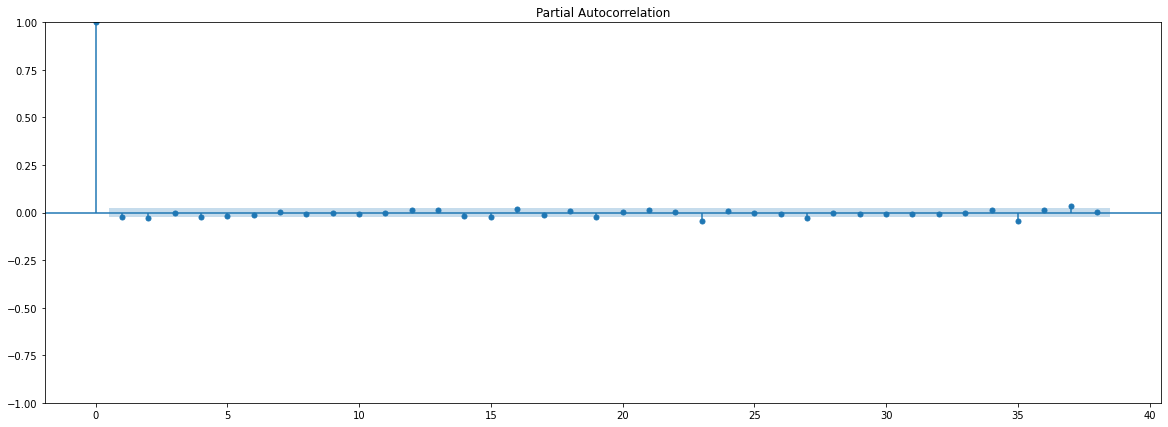

In [55]:
fig, ax = plt.subplots(figsize=(20,7))
acf = plot_acf(hl_train['Adj Close'].diff().dropna(), ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(20,7))
pacf = plot_pacf(hl_train['Adj Close'].diff().dropna(), ax=ax)
plt.show()

In [56]:
hl_model = auto_arima(hl_train, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1857.024, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1864.516, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1863.990, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1863.850, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1862.854, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1863.945, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1858.868, Time=1.87 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1861.741, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1861.945, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1860.872, Time=1.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1855.550, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1862.204, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1862.343, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1862.317, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [57]:
hl_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5749
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -924.775
Date:                Mon, 06 Mar 2023   AIC                           1855.550
Time:                        17:10:42   BIC                           1875.519
Sample:                             0   HQIC                          1862.500
                               - 5749                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9087      0.033     27.571      0.000       0.844       0.973
ma.L1         -0.9272      0.030    -31.314      0.000      -0.985      -0.869
sigma2         0.0808      0.001     96.905      0.000       0.079       0.082
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              5005.88
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               4.11   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""